In [3]:
# --- Sezione installazione librerie (esegui solo la prima volta) ---
!pip install selfies rdkit-pypi -q --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 98.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


Original SMILES: FC=C=N
Original SELFIES: [F][C][=C][=N]
Mutated SMILES: FC=N=N → valido? False
Mutated SELFIES: [=C][C][=C][=N] → valido? True


[19:44:36] Explicit valence for atom # 2 N, 4, is greater than permitted


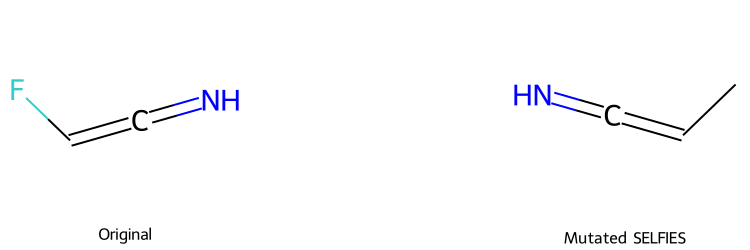

In [13]:
# --- Codice per il confronto e visualizzazione ---
import random
import selfies as sf
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.rdBase import BlockLogs
from IPython.display import display

BlockLogs()

# Molecola iniziale
original_smiles = "FC=C=N"
print("Original SMILES:", original_smiles)

# Converti a SELFIES
original_selfies = sf.encoder(original_smiles)
print("Original SELFIES:", original_selfies)

# Funzione: mutazione casuale
def mutate_string(s, charset):
    if not s:
        return s
    s_list = list(s)
    pos = random.randint(0, len(s_list) - 1)
    s_list[pos] = random.choice(charset)
    return ''.join(s_list)

# Charset SMILES semplificato
smiles_charset = list("CNOF=#:()123")

# Charset SELFIES
selfies_alphabet = list(sf.get_alphabet_from_selfies([original_selfies]))

# Mutazione SMILES
mutated_smiles = mutate_string(original_smiles, smiles_charset)
mol_mutated_smiles = Chem.MolFromSmiles(mutated_smiles)
print("Mutated SMILES:", mutated_smiles, "→ valido?", mol_mutated_smiles is not None)

# Mutazione SELFIES
selfies_tokens = list(sf.split_selfies(original_selfies)) # Convert the generator to a list
pos = random.randint(0, len(selfies_tokens) - 1)
selfies_tokens[pos] = random.choice(selfies_alphabet)
mutated_selfies = "".join(selfies_tokens)
mutated_selfies_decoded = sf.decoder(mutated_selfies)
mol_mutated_selfies = Chem.MolFromSmiles(mutated_selfies_decoded)
print("Mutated SELFIES:", mutated_selfies, "→ valido?", mol_mutated_selfies is not None)

# Molecole da visualizzare
mol_original = Chem.MolFromSmiles(original_smiles)
mol_list = [mol_original,
            mol_mutated_smiles if mol_mutated_smiles else None,
            mol_mutated_selfies]

titles = ["Original", "Mutated SMILES", "Mutated SELFIES"]
img = Draw.MolsToGridImage(mol_list, molsPerRow=3, subImgSize=(250, 250), legends=titles)

display(img)


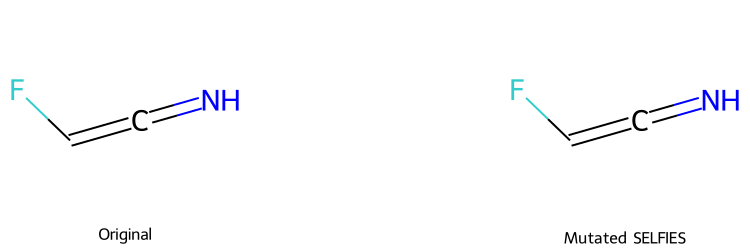
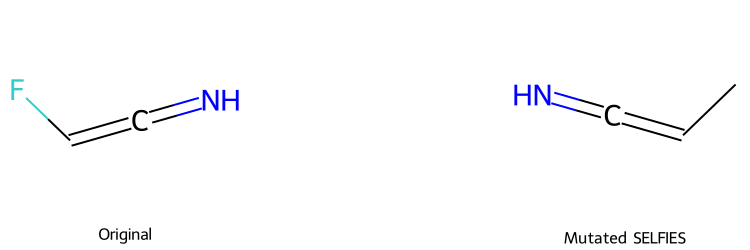